In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
new_dataset = df.loc[:, ['Age','Fare','Survived']]

In [5]:
new_dataset

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [6]:
new_dataset.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [22]:
updated_df = new_dataset.dropna(axis=0)

In [24]:
updated_df

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
885,39.0,29.1250,0
886,27.0,13.0000,0
887,19.0,30.0000,1
889,26.0,30.0000,1


In [25]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      714 non-null    float64
 2   Survived  714 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(updated_df.drop('Survived', axis=1),
                                                    updated_df['Survived'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((499, 2), (215, 2))

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
scaler.mean_

array([29.45957916, 35.0586998 ])

In [29]:
X_train

,Age,Fare
200,28.0,9.5000
439,31.0,10.5000
100,28.0,7.8958
117,29.0,21.0000
625,61.0,32.3208
...,...,...
883,28.0,10.5000
238,19.0,10.5000
789,46.0,79.2000
704,26.0,7.8542


In [30]:
X_train_scaled

array([[-1.00948962e-01, -4.50979714e-01],
       [ 1.06540220e-01, -4.33334853e-01],
       [-1.00948962e-01, -4.79285601e-01],
       [-3.17859012e-02, -2.48063809e-01],
       [ 2.18143204e+00, -4.83098624e-02],
       [-9.30905689e-01, -1.20637882e-02],
       [ 2.44866341e-01, -4.65757286e-01],
       [ 1.00566001e+00, -4.78770371e-01],
       [-8.61742628e-01, -4.91047666e-01],
       [-3.77601204e-01,  6.04182995e-01],
       [ 1.06540220e-01,  3.43280813e-02],
       [ 5.21518584e-01, -4.49435789e-01],
       [-7.92579568e-01, -4.81858222e-01],
       [-5.85090386e-01, -4.65757286e-01],
       [ 1.06540220e-01, -4.65390273e-01],
       [-1.89918854e+00, -1.04699310e-01],
       [ 3.73771594e-02, -4.76564763e-01],
       [-9.30905689e-01, -3.00998393e-01],
       [-1.89918854e+00, -2.46740444e-01],
       [-1.62253629e+00, -3.63254725e-02],
       [ 1.14398613e+00,  4.60818496e-01],
       [ 1.69729061e+00,  4.29498867e-01],
       [-3.77601204e-01, -1.42194641e-01],
       [ 3.

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [32]:
X_train_scaled

,Age,Fare
0,-0.100949,-0.450980
1,0.106540,-0.433335
2,-0.100949,-0.479286
3,-0.031786,-0.248064
4,2.181432,-0.048310
...,...,...
494,-0.100949,-0.433335
495,-0.723417,-0.433335
496,1.143986,0.778867
497,-0.239275,-0.480020


In [33]:
X_test_scaled

,Age,Fare
0,-0.100949,-0.364520
1,1.420638,-0.111978
2,-1.973885,2.055473
3,0.452356,-0.391428
4,-0.239275,-0.089260
...,...,...
210,1.109405,-0.491122
211,-0.377601,-0.481050
212,-0.239275,-0.479286
213,1.835617,0.848711


In [34]:
np.round(X_train.describe(), 1)

,Age,Fare
count,499.0,499.0
mean,29.5,35.1
std,14.5,56.7
min,0.7,0.0
25%,20.0,8.0
50%,28.0,15.6
75%,38.0,33.8
max,74.0,512.3


In [35]:
np.round(X_train_scaled.describe(), 1)

,Age,Fare
count,499.0,499.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-0.6
25%,-0.7,-0.5
50%,-0.1,-0.3
75%,0.6,-0.0
max,3.1,8.4


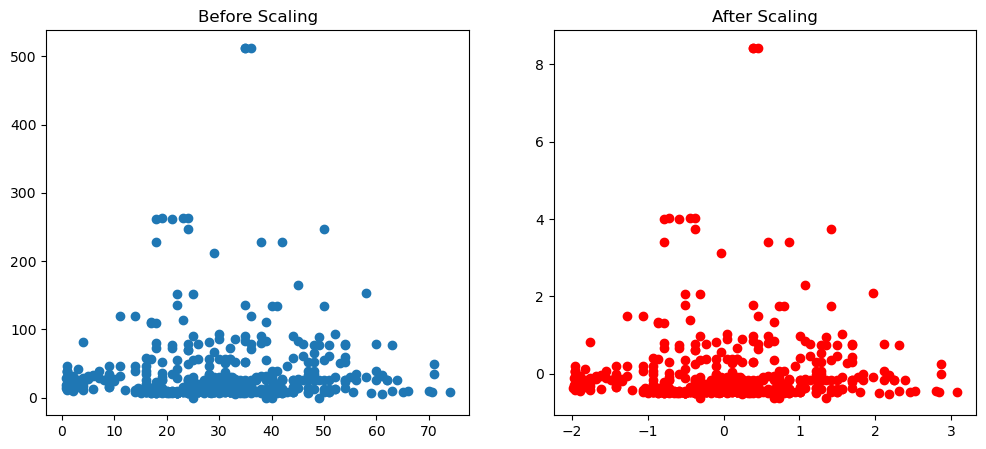

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['Fare'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['Fare'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [39]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [40]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6465116279069767
Scaled 0.6465116279069767
